## Implementing Logistic Regression to predict Online Product reviews - rating to determine the sentiment

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-plot
!pip install imbalanced-learn
import scikitplot as skplt
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install stop_words

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=c097d8479d7165c0a4e7c1c438259bea244636348c11ac872fc9febf56ceab3d
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [4]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

True

In [5]:
#loading the dataset
reviews_df=pd.read_csv('/content/drive/MyDrive/CMPE_257_Project/amazon_dataset/reviews_data.csv')
reviews_df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,8.90E+11
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,8.90E+11
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,8.90E+11
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-01T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,8.90E+11
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-11-28T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,8.90E+11


In [6]:
reviews_df.shape

(78343, 20)

In [7]:
#Columns/attributes and their datatypes
reviews_df.dtypes

id                      object
brand                   object
categories              object
dateAdded               object
dateUpdated             object
ean                     object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
reviews.date            object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
upc                     object
dtype: object

### Data Cleaning and Preprocessing

In [8]:
reviews_df.isnull().sum()

id                         0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    36327
keys                       0
manufacturer            2808
manufacturerNumber       203
name                       0
reviews.date             128
reviews.dateSeen           0
reviews.doRecommend    40277
reviews.numHelpful     40022
reviews.rating           164
reviews.sourceURLs         0
reviews.text              41
reviews.title            480
reviews.username          96
upc                        2
dtype: int64

In [9]:
#dropping null values from the important columns used for model training

reviews_df = reviews_df.dropna(subset=['reviews.text']) #dropping null reviews text
reviews_df = reviews_df.dropna(subset=['reviews.title']) #dropping null reviews title
reviews_df = reviews_df.dropna(subset=['reviews.rating']) #dropping null ratings

In [10]:
reviews_df.shape

(77670, 20)

In [11]:
reviews_df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

761

In [12]:
#dropping the duplicated values based on review text, username, rating and date
reviews_df=reviews_df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [13]:
reviews_df.shape

(76909, 20)

In [14]:
reviews_df["full_review"] = reviews_df['reviews.title'].astype(str) +" "+ reviews_df["reviews.text"]

In [15]:
# preprocessing the reviews text (converting to lowercase, removing string literals)
reviews_df["full_review"] = (
    reviews_df["full_review"]
    .str.lower()                    
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [16]:
reviews_df['full_review']

0        love the fingerprint reader this keyboard is v...
1        nice its thin and light i can type pretty easi...
2        new i love the new design the keys are spaced ...
3        nice keyboard attached easily and firmly has a...
4        nice improvement our original keyboard was oka...
                               ...                        
78338    solves the problem im dealing with dry eyes an...
78339    great stuff great stuff helps keep my contacts...
78340                                my review right price
78341    wonderful product i was so pleased when this s...
78342    makes the holidays better excellent album make...
Name: full_review, Length: 76909, dtype: object

In [17]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [18]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(reviews_df["full_review"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

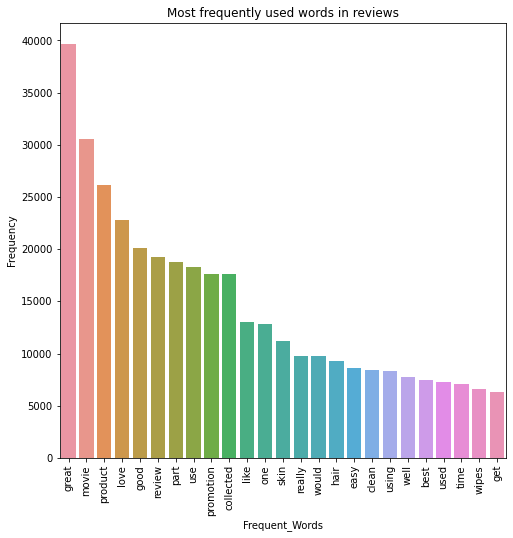

In [19]:
#plotting the most frequently used words in the reviews texts.
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [20]:
# preprocessing reviews text
lemmatizer_output = WordNetLemmatizer()

reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: word_tokenize(x.lower()) # converting the text to lower case
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [word for word in x if word not in STOPWORDS] #getting rid of stopwords
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x] #lemmatizes the words in reviews text
)
reviews_df["full_review"] = reviews_df["full_review"].apply(lambda x: " ".join(x))

In [21]:
reviews_df['full_review'].head(15)

0     love fingerprint reader keyboard easy type fin...
1                    nice thin light type pretty easily
2     new love new design key spaced well mi type fi...
3     nice keyboard attached easily firmly nice feel...
4     nice improvement original keyboard okay laptop...
5     big improvement purchased replace original sur...
6     perfect type cover find comfortable type rarel...
7     good keyboard good keyboard addition surface p...
8     nice improvement tough getting work surface pr...
9     fingerprint scanner worth money now quickly ha...
10             must must accessory surface pro computer
11    worth price fingerprint scanner price worth go...
12    great keyboard great cover keyboard feel surpr...
13    keyboard smooth really fingerprint id make log...
14    pricey good product expensive easy setup plent...
Name: full_review, dtype: object

### Visualization

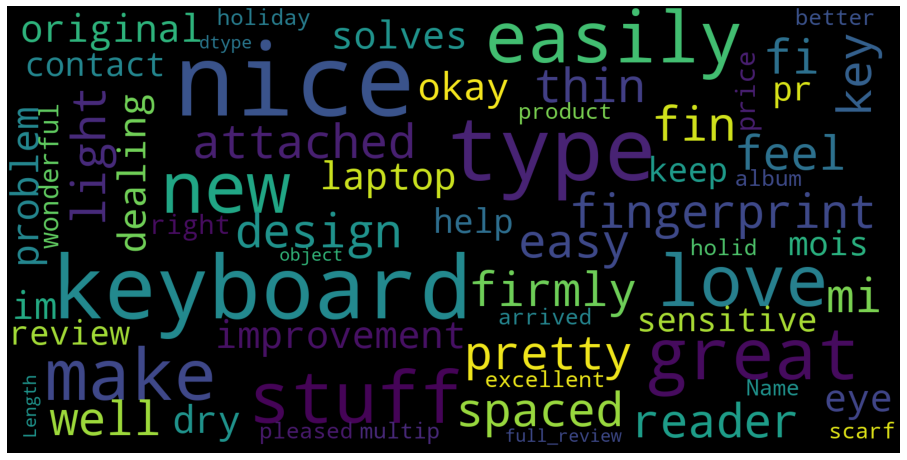

In [22]:
#plotting wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(reviews_df["full_review"])


[Text(0.5, 1.0, 'Frequency of each rating')]

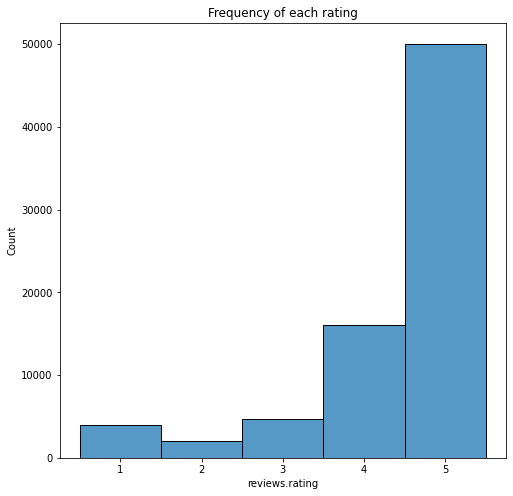

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=reviews_df, x=reviews_df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

In [24]:
#review by brand
reviews_df.groupby(reviews_df['brand']).mean()['reviews.rating']

brand
4C Foods               5.000000
AMBI                   4.750000
ANCHOR BAY             4.766667
Adesso                 5.000000
Advantage              4.000000
                         ...   
Yes to Grapefruit      3.846154
Yosemite Home Decor    1.000000
Zyliss                 4.644068
bareMinerals           5.000000
iStarUSA               3.000000
Name: reviews.rating, Length: 397, dtype: float64

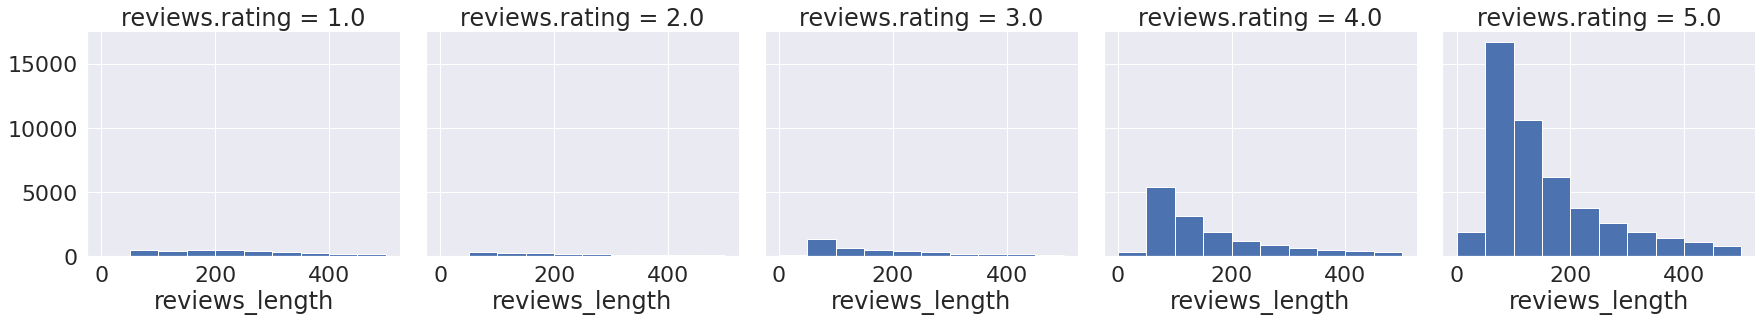

In [25]:
reviews_df["reviews_length"] = reviews_df["reviews.text"].apply(len)
sns.set(font_scale=2.0)

graph = sns.FacetGrid(reviews_df,col='reviews.rating',size=5)
graph.map(plt.hist,'reviews_length', range=[0, 500])

In [26]:
reviews_df['reviews.doRecommend'].fillna("N/A",inplace=True)

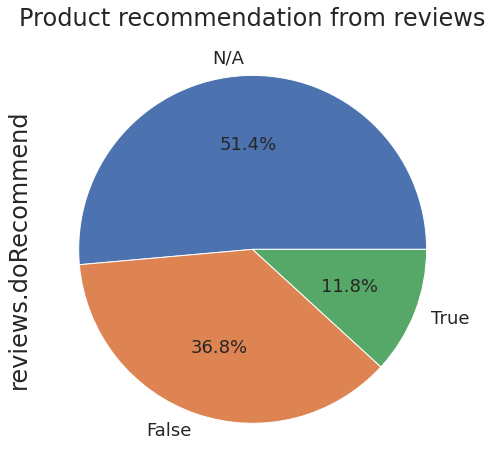

In [27]:
plt.figure(figsize = (8,8))
plt.title("Product recommendation from reviews")
reviews_df["reviews.doRecommend"].value_counts().plot.pie(autopct="%1.1f%%",textprops={'fontsize': 18})

Text(0, 0.5, 'No. of people that found the review helpful')

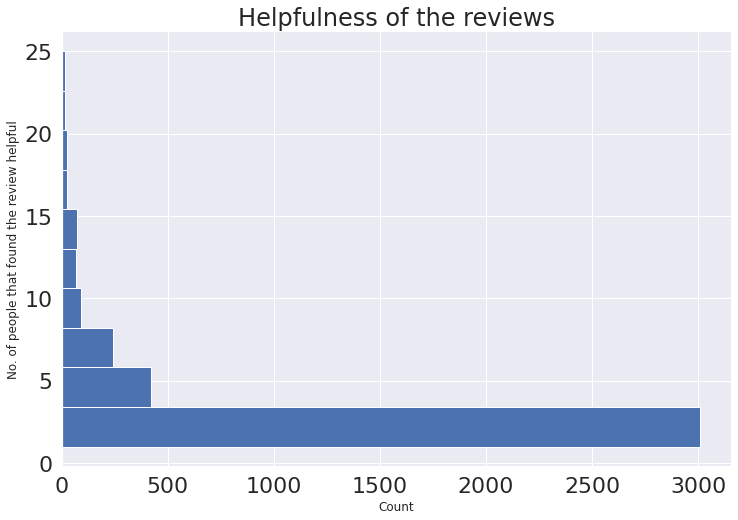

In [28]:
plt.figure(figsize=(12,8))
plt.hist(reviews_df['reviews.numHelpful'],range=[1, 25], orientation='horizontal')
plt.title("Helpfulness of the reviews")
plt.xlabel("Count", fontsize=12)
plt.ylabel("No. of people that found the review helpful", fontsize=12)

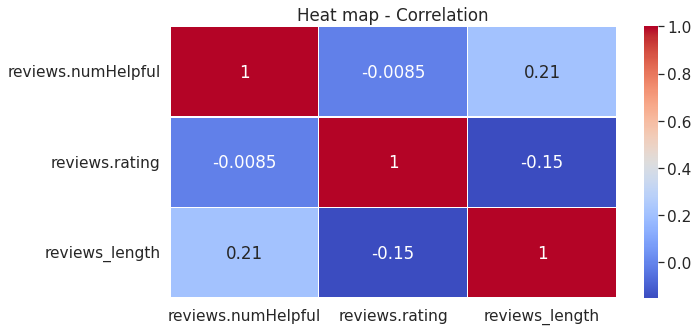

In [29]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
plt.title("Heat map - Correlation")
sns.heatmap(reviews_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

### Preprocessing and resampling data

In [30]:
# updating sentiments to classify in a linear model
reviews_df.loc[reviews_df['reviews.rating'] < 4, 'sentiment'] = 0 #0 indicating not a happy review
reviews_df.loc[reviews_df['reviews.rating'] >= 4, 'sentiment'] = 1 #1 indicating a happy review

In [31]:
reviews_df['sentiment']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
78338    1.0
78339    1.0
78340    1.0
78341    1.0
78342    1.0
Name: sentiment, Length: 76909, dtype: float64

In [32]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

whole_text = reviews_df['full_review']
train_text = reviews_df['full_review']
y_sentiment = reviews_df['sentiment']

In [33]:
#vectorizing the input reviews text
word_vec = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}', stop_words = 'english', ngram_range = (1, 1), max_features=10000)
word_vec.fit(whole_text)
train_features = word_vec.transform(train_text)

In [34]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [35]:
#Undersampling for linear model (lm)

nm_lm = NearMiss()
X_lm_undersample, y_lm_undersample = nm_lm.fit_resample(train_features, y_sentiment)

In [36]:
#Oversampling for linear model (lm)

smote_lm = SMOTE(random_state=42)
X_lm_oversample, y_lm_oversample= smote_lm.fit_resample(train_features, y_sentiment)

In [37]:
print('Original dataset shape after updating sentiment %s' % Counter(y_sentiment))
print('Undersampled dataset shape after updating sentiment %s' % Counter(y_lm_undersample))
print('Oversampled dataset shape after updating sentiment %s' % Counter(y_lm_oversample))

Original dataset shape after updating sentiment Counter({1.0: 66142, 0.0: 10767})
Undersampled dataset shape after updating sentiment Counter({0.0: 10767, 1.0: 10767})
Oversampled dataset shape after updating sentiment Counter({1.0: 66142, 0.0: 66142})


In [38]:
from sklearn.model_selection import train_test_split
X_lm_train_us, X_lm_test_us, y_lm_train_us, y_lm_test_us = train_test_split(X_lm_undersample, y_lm_undersample, test_size=0.3, random_state=101)
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(train_features, y_sentiment, test_size=0.3, random_state=101)
X_lm_train_os, X_lm_test_os, y_lm_train_os, y_lm_test_os = train_test_split(X_lm_oversample, y_lm_oversample, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

lr_us = LogisticRegression().fit(X_lm_train_us, y_lm_train_us)
lr_pred_us = lr_us.predict(X_lm_test_us)
print(lr_pred_us)
lr_us.score(X_lm_train_us, y_lm_train_us)

[0. 0. 0. ... 0. 0. 1.]


0.9230411994957872

In [40]:
lr = LogisticRegression().fit(X_lm_train, y_lm_train)
lr_pred = lr.predict(X_lm_test)
print(lr_pred)
lr.score(X_lm_train, y_lm_train)

[1. 0. 1. ... 1. 1. 1.]


0.9309569804591723

In [41]:
lr_os = LogisticRegression().fit(X_lm_train_os, y_lm_train_os)
lr_pred_os = lr_os.predict(X_lm_test_os)
print(lr_pred_os)
lr_os.score(X_lm_train_os, y_lm_train_os)

[1. 1. 0. ... 1. 0. 0.]


0.9091773040454437

In [42]:
print("Training accuracy score on undersampled data: ", lr_us.score(X_lm_train_us, y_lm_train_us))
print("Training accuracy score on original data: ", lr.score(X_lm_train, y_lm_train))
print("Training accuracy score on oversampled data: ", lr_os.score(X_lm_train_os, y_lm_train_os))

Training accuracy score on undersampled data:  0.9230411994957872
Training accuracy score on original data:  0.9309569804591723
Training accuracy score on oversampled data:  0.9091773040454437


To ensure that there is enough  data for building a good model, I applied resampling techniques. 

The training accuracy score for the models is close to a hundred percent. This implies that the error for the models on training is close to zero. This ensures that the model is learned properly. 

In [43]:
# saving the models to use them for any further testing
filename = '/content/drive/MyDrive/CMPE_257_Project/logisticregression_undersampled.sav'
pickle.dump(lr_us, open(filename, 'wb'))
filename = '/content/drive/MyDrive/CMPE_257_Project/logisticregression.sav'
pickle.dump(lr, open(filename, 'wb'))
filename = '/content/drive/MyDrive/CMPE_257_Project/logisticregression_oversampled.sav'
pickle.dump(lr_os, open(filename, 'wb'))

In [44]:
from sklearn.metrics import classification_report
print("Classification report for Undersampled data using Logisitic Regression (Linear model).")
print(classification_report(y_lm_test_us, lr_pred_us, labels=[0,1]))
print("\nClassification report for Original (no resampling) data using Logisitic Regression (Linear model).")
print(classification_report(y_lm_test, lr_pred, labels=[0,1]))
print("\nClassification report for Oversampled data using Logisitic Regression (Linear model).")
print(classification_report(y_lm_test_os, lr_pred_os, labels=[0,1]))

Classification report for Undersampled data using Logisitic Regression (Linear model).
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3275
           1       0.91      0.91      0.91      3186

    accuracy                           0.91      6461
   macro avg       0.91      0.91      0.91      6461
weighted avg       0.91      0.91      0.91      6461


Classification report for Original (no resampling) data using Logisitic Regression (Linear model).
              precision    recall  f1-score   support

           0       0.84      0.53      0.65      3234
           1       0.93      0.98      0.95     19839

    accuracy                           0.92     23073
   macro avg       0.88      0.76      0.80     23073
weighted avg       0.92      0.92      0.91     23073


Classification report for Oversampled data using Logisitic Regression (Linear model).
              precision    recall  f1-score   support

           0     

The f1 score for oversampled data is good. For no resampling, the f1 score is low for class 0.

The testing accuracy or f1 score is close to a hundred. This implies that the error for out of training data is close to zero. This ensures that the errors for insample and out of sample data are similar, close to zero and the model is learned properly. 

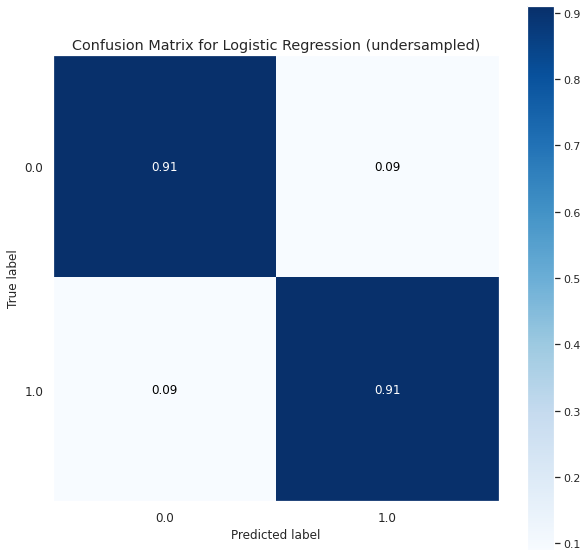

In [45]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_lm_test_us, lr_pred_us, normalize=True, title = 'Confusion Matrix for Logistic Regression (undersampled)')
plt.show()

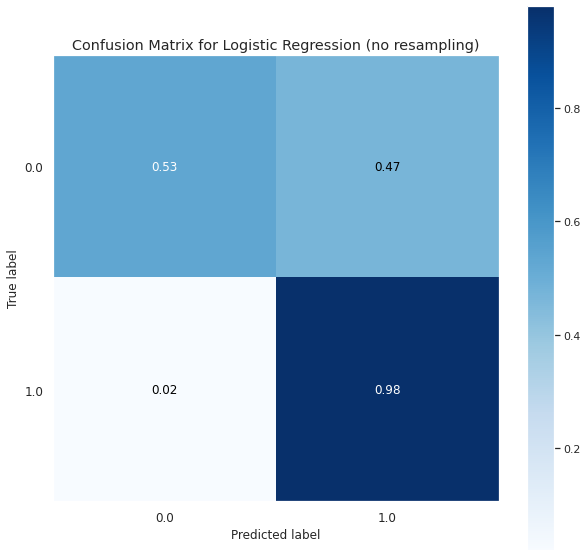

In [46]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_lm_test, lr_pred, normalize=True, title = 'Confusion Matrix for Logistic Regression (no resampling)')
plt.show()

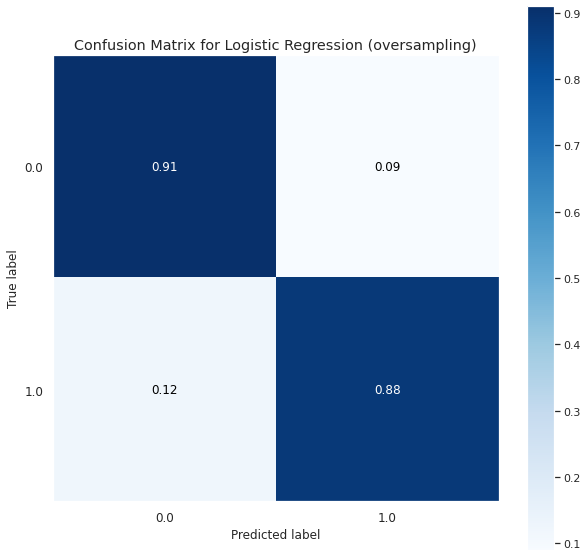

In [47]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_lm_test_os, lr_pred_os, normalize=True, title = 'Confusion Matrix for Logistic Regression (oversampling)')
plt.show()

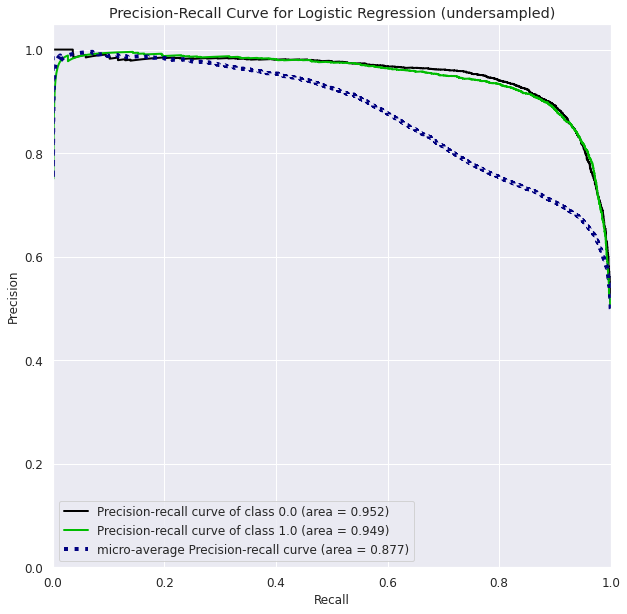

In [51]:
probas3 = lr.predict_proba(X_lm_test_us)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_lm_test_us, probas3, title = 'Precision-Recall Curve for Logistic Regression (undersampled)')
plt.show()

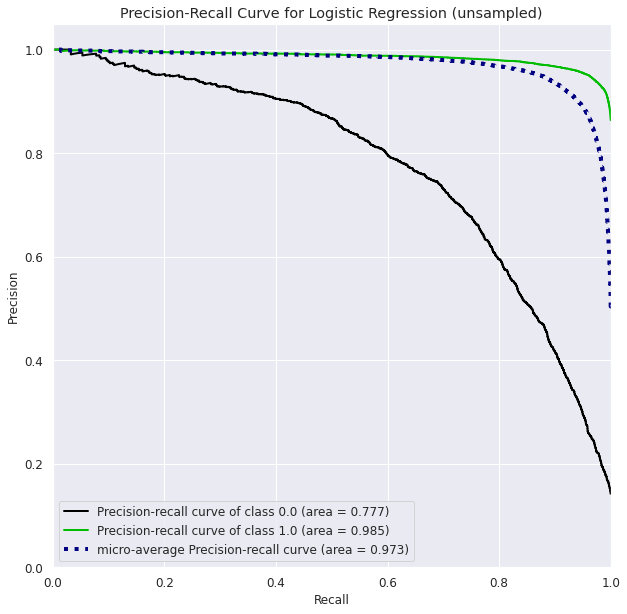

In [52]:
probas4 = lr.predict_proba(X_lm_test)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_lm_test, probas4, title = 'Precision-Recall Curve for Logistic Regression (unsampled)')
plt.show()

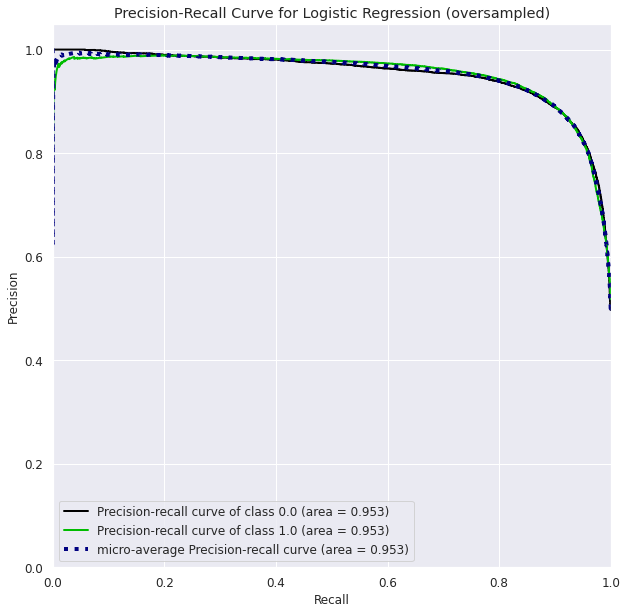

In [53]:
probas5 = lr_os.predict_proba(X_lm_test_os)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_lm_test_os, probas5, title = 'Precision-Recall Curve for Logistic Regression (oversampled)')
plt.show()

Even from visualizations it is observed that without resampling, the predictions for class 0 are not satisfactory.

The curves for the model that is trained on oversampled data is better and more consistent in classification

In [54]:
from sklearn.metrics import log_loss
probas5_us = lr_us.predict_proba(X_lm_test_us)
probas5_ = lr.predict_proba(X_lm_test)
print("Log loss for undersampled data on Logistic Regression")
print(log_loss(y_lm_test_us, probas5_us))
print("\nLog loss for original (no resampling) data on Logistic Regression")
print(log_loss(y_lm_test, probas5_))
print("\nLog loss for oversampled data on Logistic Regression")
print(log_loss(y_lm_test_os, probas5))

Log loss for undersampled data on Logistic Regression
0.24759065868006402

Log loss for original (no resampling) data on Logistic Regression
0.20920367003453066

Log loss for oversampled data on Logistic Regression
0.2820153579591828


The loss is low for this model. On the given dataset, the loss is closer to zero.

### Custom test cases

In [55]:
# giving some custom test inputs to evaluate the model
custom_test_inputs = ["so satisfied with the purchase good product works well", "this device feels ok it works fine", "really disappointed with the purchase defective product not working", "used to be good but since the change the worst product ever", "used to be bad but from when it was updated it is the best product ever"]
inputs_vec = word_vec.transform(custom_test_inputs)

In [56]:
# testing on rfc_os model (Logisitic Regression model that was trained on the oversampled data.)
custom_preds = lr_us.predict(inputs_vec)
for index in range(len(custom_test_inputs)):
  if custom_preds[index] == 0:
    print("The rating predicted for the review - \"", custom_test_inputs[index], "\" is : ", custom_preds[index], " (Not satisfied/Negative review)")
  elif custom_preds[index] == 1:
    print("The rating predicted for the review - \"", custom_test_inputs[index], "\" is : ", custom_preds[index], " (Satisfied/Positive review)")

The rating predicted for the review - " so satisfied with the purchase good product works well " is :  1.0  (Satisfied/Positive review)
The rating predicted for the review - " this device feels ok it works fine " is :  0.0  (Not satisfied/Negative review)
The rating predicted for the review - " really disappointed with the purchase defective product not working " is :  0.0  (Not satisfied/Negative review)
The rating predicted for the review - " used to be good but since the change the worst product ever " is :  0.0  (Not satisfied/Negative review)
The rating predicted for the review - " used to be bad but from when it was updated it is the best product ever " is :  0.0  (Not satisfied/Negative review)


On undersampled data, the rating predictions on this version of the model are not accurate.

In [ ]:
# testing on rfc_os model (Logisitic Regression model that was trained on the oversampled data.)
custom_preds = lr_os.predict(inputs_vec)
for index in range(len(custom_test_inputs)):
  if custom_preds[index] == 0:
    print("The rating predicted for the review - \"", custom_test_inputs[index], "\" is : ", custom_preds[index], " (Not satisfied/Negative review)")
  elif custom_preds[index] == 1:
    print("The rating predicted for the review - \"", custom_test_inputs[index], "\" is : ", custom_preds[index], " (Satisfied/Positive review)")

The rating predicted for the review - " so satisfied with the purchase good product works well " is :  1.0  (Satisfied/Positive review)
The rating predicted for the review - " this device feels ok it works fine " is :  0.0  (Not satisfied/Negative review)
The rating predicted for the review - " really disappointed with the purchase defective product not working " is :  0.0  (Not satisfied/Negative review)
The rating predicted for the review - " used to be good but since the change the worst product ever " is :  0.0  (Not satisfied/Negative review)
The rating predicted for the review - " used to be bad but from when it was updated it is the best product ever " is :  1.0  (Satisfied/Positive review)


On Oversampled data, the rating predictions on this version of the model are pretty accurate.